# This type of neural networks form part of the unsupervised learning paradigm.


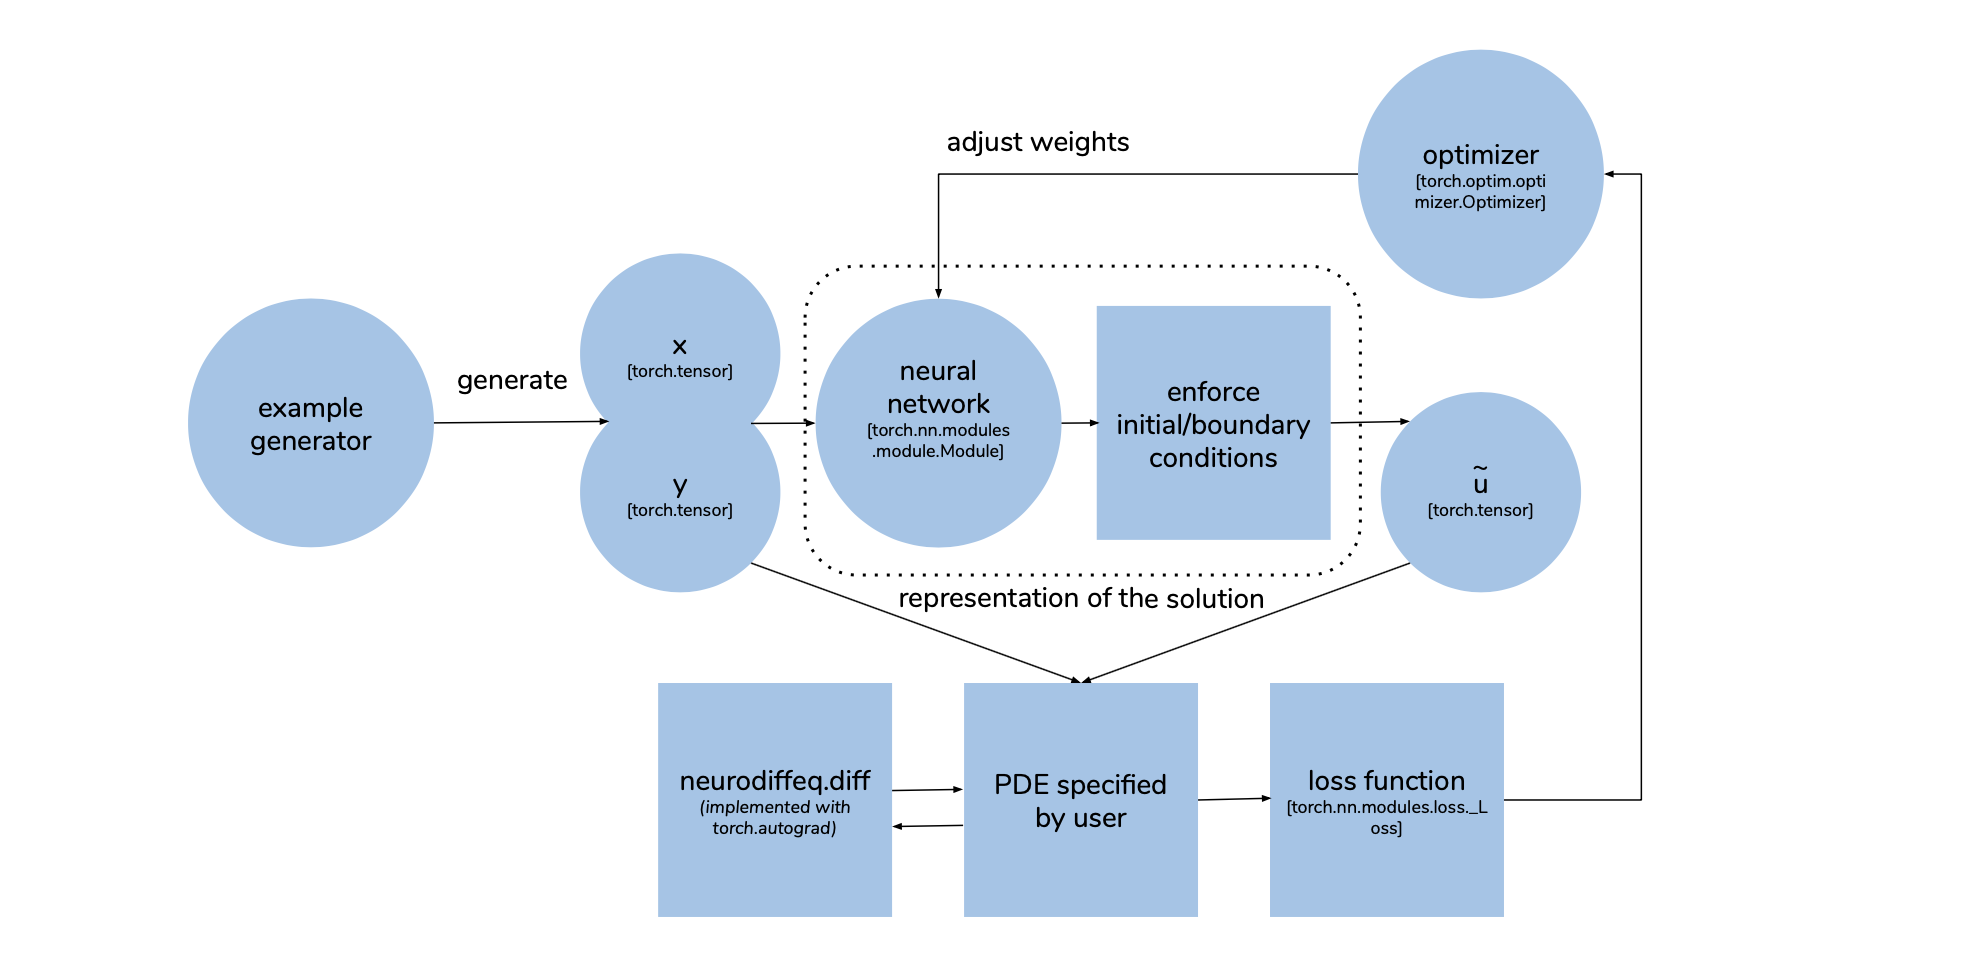

# Tipos de problemas que puede resolver NeuroDiffEq



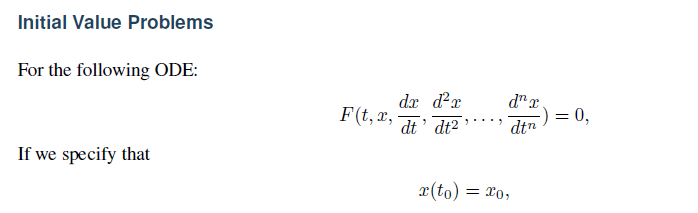

---
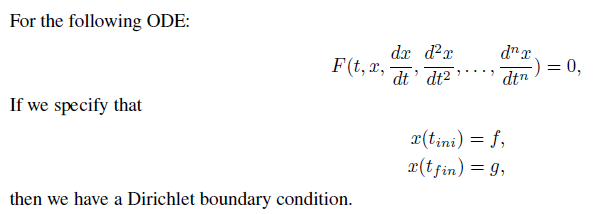

---
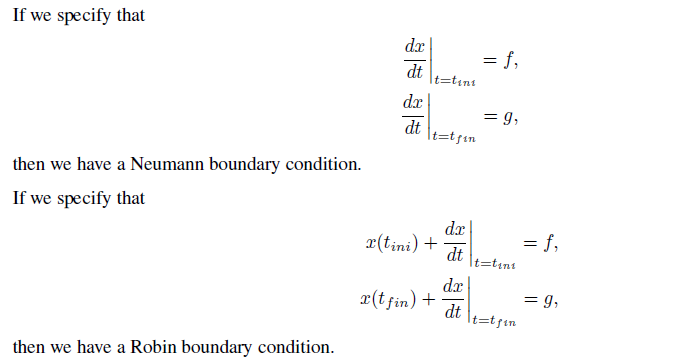


---
# Sistemas de ecuaciones

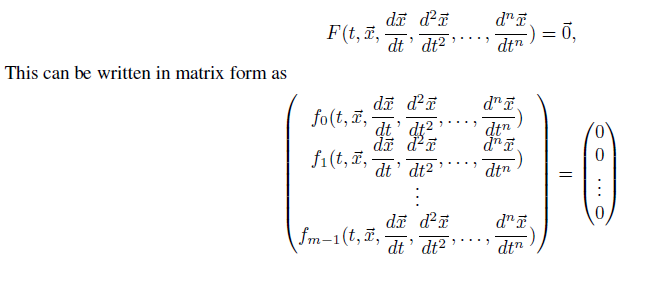

---
# Ecuaciones parciales

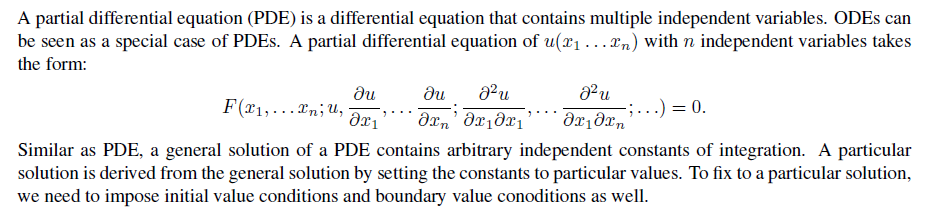

# Ejemplos


In [3]:
import numpy as np
import matplotlib.pyplot as plt

For solving a particular case of DE, we have to take the DE into one of the forms above.

In [4]:
#pip install -U neurodiffeq 

In [5]:
from neurodiffeq import diff      # the differentiation operation
from neurodiffeq.ode import solve # the ANN-based solver
from neurodiffeq.conditions import IVP   # the initial condition

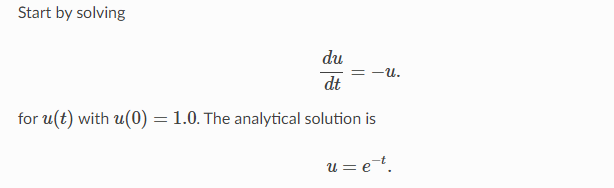

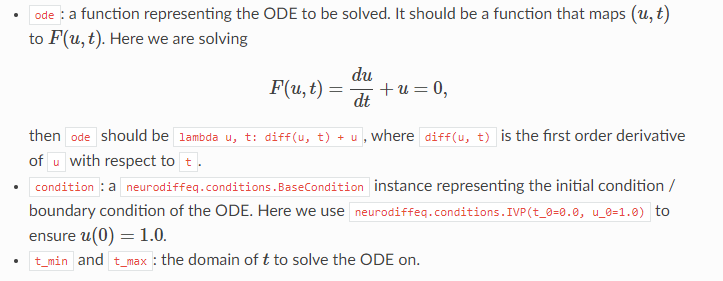

In [6]:
exponential = lambda u, t: diff(u, t) + u # specify the ODE
init_val_ex = IVP(t_0=0.0, u_0=1.0)       # specify the initial conditon

# solve the ODE
solution_ex, loss_ex = solve(
    ode=exponential, condition=init_val_ex, t_min=0.0, t_max=2.0
)

D:\Programas\Anaconda2\lib\site-packages\neurodiffeq\ode.py:260: FutureWarning: The `solve_system` function is deprecated, use a `neurodiffeq.solvers.Solver1D` instance instead
  warnings.warn(


Training Progress:   0%|                                                                      | 0/1000 [00:00<…

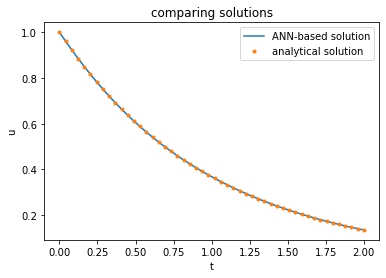

In [7]:
ts = np.linspace(0, 2.0, 50) #Domain
u_net = solution_ex(ts, to_numpy=True) #ANN, regresa una función que debe ser evaluada
u_ana = np.exp(-ts) #Real

plt.figure()
plt.plot(ts, u_net, label='ANN-based solution')
plt.plot(ts, u_ana, '.', label='analytical solution')
plt.ylabel('u')
plt.xlabel('t')
plt.title('comparing solutions')
plt.legend()

### Para graficar el desempeño de la red

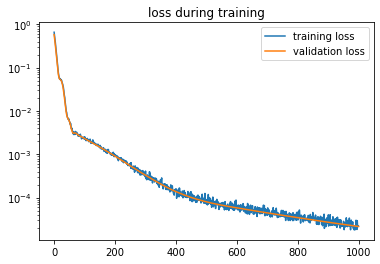

In [8]:
plt.figure()
plt.plot(loss_ex['train_loss'], label='training loss')
plt.plot(loss_ex['valid_loss'], label='validation loss')
plt.yscale('log')
plt.title('loss during training')
plt.legend()
plt.show()

---
#DE systems

In [9]:
from neurodiffeq import diff
from neurodiffeq.solvers import Solver1D, Solver2D
from neurodiffeq.conditions import IVP, DirichletBVP2D
from neurodiffeq.networks import FCNN, SinActv
import torch

### Ecuación a resolver
$$\frac{d^2 \eta}{d t^2} + k \frac{\eta}{(\eta^2 + 1)^{3/2}}$$


Con las condiciones iniciales: $$\eta(0)=a$$
$$\dot{\eta}(0) = 0$$

donde $k$ y $a$ son constantes.


In [10]:
a=1 
k=5
ti=0.0 #intervalo del tiempo a resolver la función [ti,tf]
tf=10

#definimos la ecuación diferencial
tacos = lambda eta, t: diff(eta, t, order=2) + k*eta/(eta**2 + 1)**(3/2)    #order indica el orden de la derivada que se está aplicando

#llamamos a la función de problema de valor inicial, que recibe el valor de t0, el de la función y el de la derivada
initial_val = IVP(t_0=0.0, u_0=a, u_0_prime=0.0) #u_0_prime es el valor inicial de la derivada en t0=0 (en este caso)

#Ahora llamamos al compilador, o solucionador

solution_ho, _ = solve(
ode=tacos, condition=initial_val, t_min=ti, t_max=tf,
max_epochs=3000,)

D:\Programas\Anaconda2\lib\site-packages\neurodiffeq\ode.py:260: FutureWarning: The `solve_system` function is deprecated, use a `neurodiffeq.solvers.Solver1D` instance instead
  warnings.warn(


Training Progress:   0%|                                                                      | 0/3000 [00:00<…

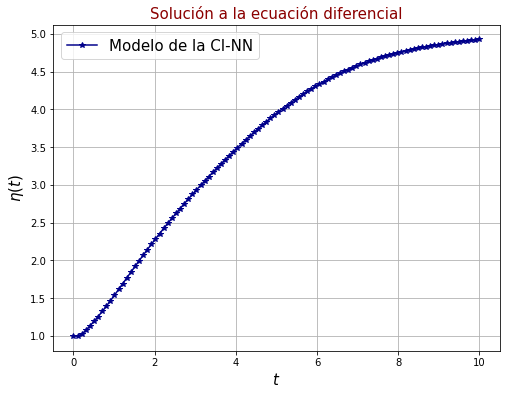

In [11]:
plt.figure(figsize=(8,6))
ts = np.linspace(ti, tf, 100)
eta_net = solution_ho(ts, to_numpy=True)
plt.plot(ts, eta_net,'*-',color='darkblue' ,label='Modelo de la CI-NN')
plt.ylabel('$\\eta(t)$', size=15)
plt.xlabel('$t$', size=15)
plt.title('Solución a la ecuación diferencial', size=15, color='darkred')
plt.grid()
plt.legend(fontsize=15);

# 2 Performance on cosmological equations
Now, let's deal with systems of cosmological differential equations, and to compare with an usual library of python: Odeint.



In [12]:
#pip install -U neurodiffeq 

In [13]:
import matplotlib.pyplot as plt
import numpy as np

---
# Sistemas de ecuaciones

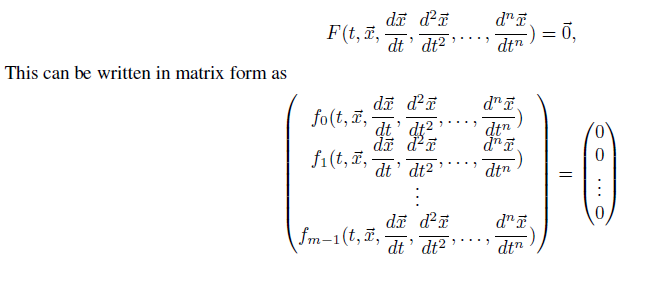

The system of ODE used here is the obtained from continuity equation. In terms of the dimensionless parameters, It is defined as:

$$\Omega'_i = 3(\Pi - \gamma_i)\Omega_i $$

with $\Pi = \sum_i \Omega_i \gamma_i$

$\gamma_m = 0, \gamma_r=1/3, \gamma_\Lambda = -1$

And the initial conditions are: $\Omega_{i,0}$

First, $\texttt{Neuroeqdiff}$
We set the system as: $F(t,u_i,u_i^{(n)})=0$

In [14]:
from neurodiffeq import diff 
from neurodiffeq.ode import solve_system
from neurodiffeq.conditions import IVP
from neurodiffeq.monitors import Monitor1D
from neurodiffeq.solvers import Solver1D
import torch

In [25]:
#constants
gm = 0
gr= 1.0/3.0
gl= -1

#density parameters measured today
Or0 = 0.0001
Om0 = 0.3
Ol0 = 1-Or0-Om0

#Epochs
epochs = 20000

#Domain
Ni=0
Nf=-12

In [26]:
#system
continuity = lambda Om,Or,Ol,N:[diff(Om,N) - 3*(gm*Om + gl*Ol + gr*Or - gm)*Om,
                                 diff(Or,N) - 3*(gm*Om + gl*Ol + gr*Or - gr)*Or,
                                 diff(Ol,N) - 3*(gm*Om + gl*Ol + gr*Or - gl)*Ol
                                 ]
#initial condditions
init_conditions = [IVP(t_0=0.0,u_0=Om0),
                   IVP(t_0=0.0,u_0=Or0),
                   IVP(t_0=0.0, u_0=Ol0)]

<IPython.core.display.Javascript object>


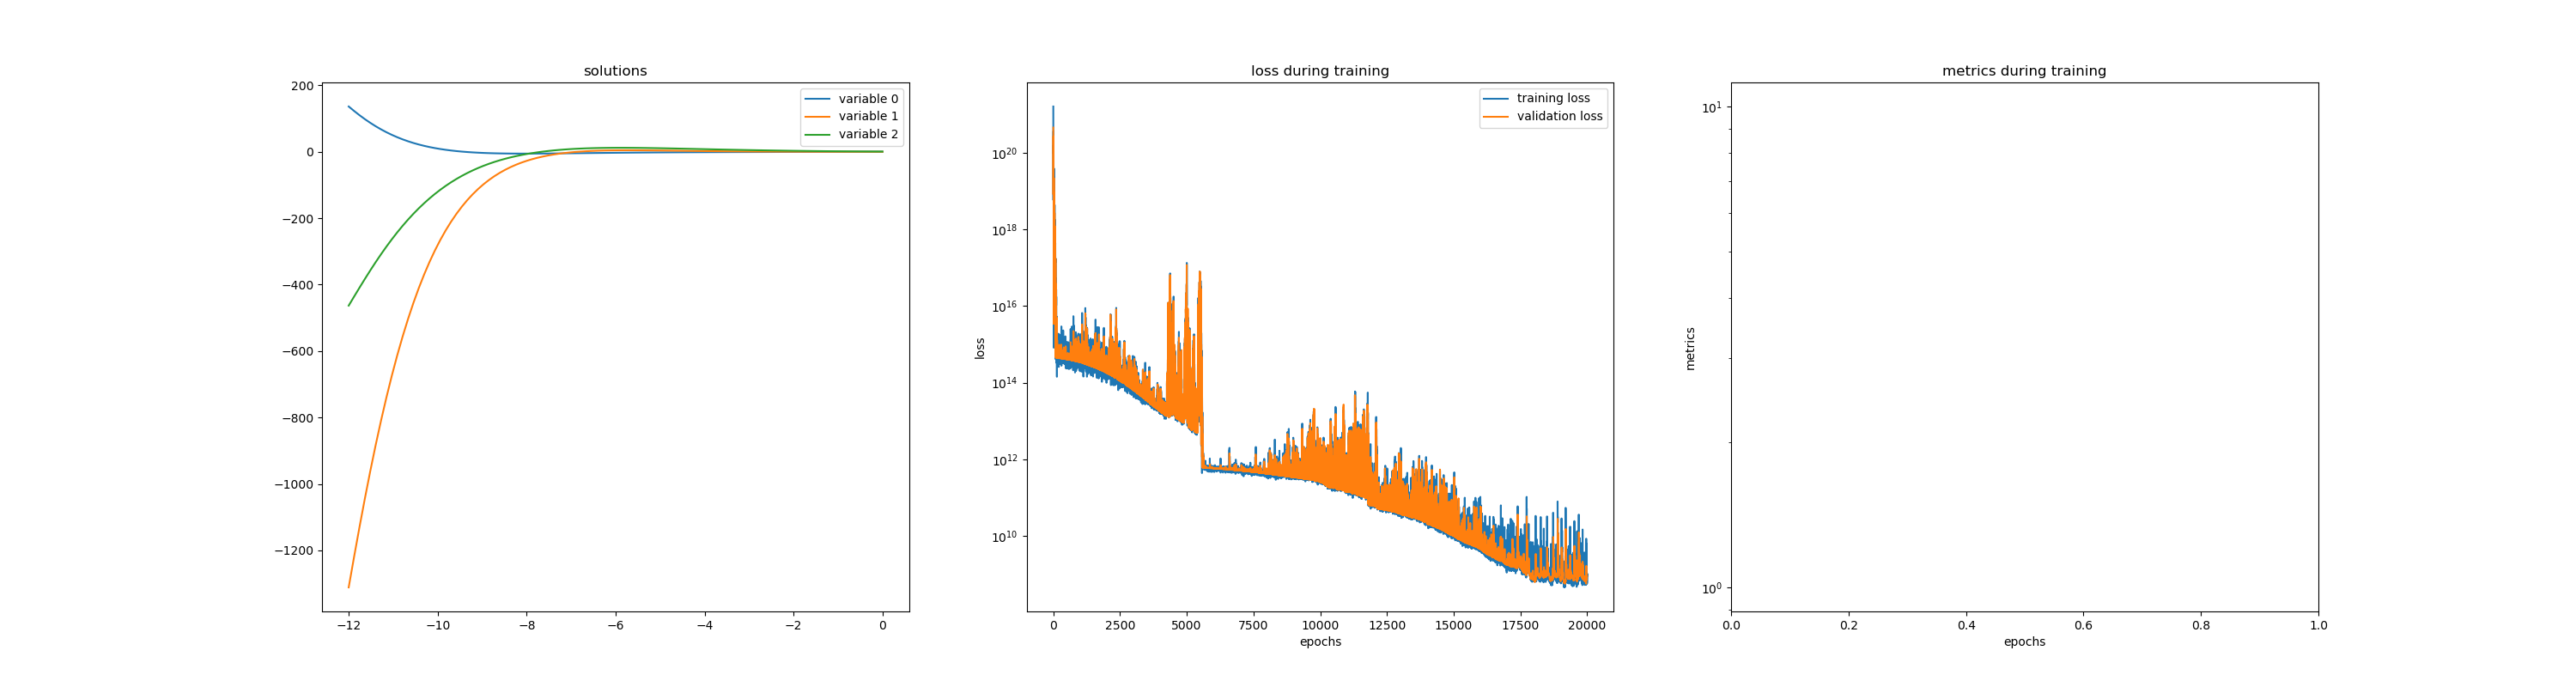

D:\Programas\Anaconda2\lib\site-packages\neurodiffeq\ode.py:260: FutureWarning: The `solve_system` function is deprecated, use a `neurodiffeq.solvers.Solver1D` instance instead
  warnings.warn(
D:\Programas\Anaconda2\lib\site-packages\neurodiffeq\solvers.py:459: UserWarning: Passing `monitor` is deprecated, use a MonitorCallback and pass a list of callbacks instead
  warnings.warn("Passing `monitor` is deprecated, "


Training Progress:   0%|                                                                     | 0/20000 [00:00<…

In [28]:
#Solving
%matplotlib notebook

sol_params,_ = solve_system(ode_system=continuity,conditions=init_conditions,max_epochs=epochs,
                            t_min=-14, t_max=0.1,
                            monitor=Monitor1D(t_min=-12, t_max=0, check_every=400)
                            )

<IPython.core.display.Javascript object>


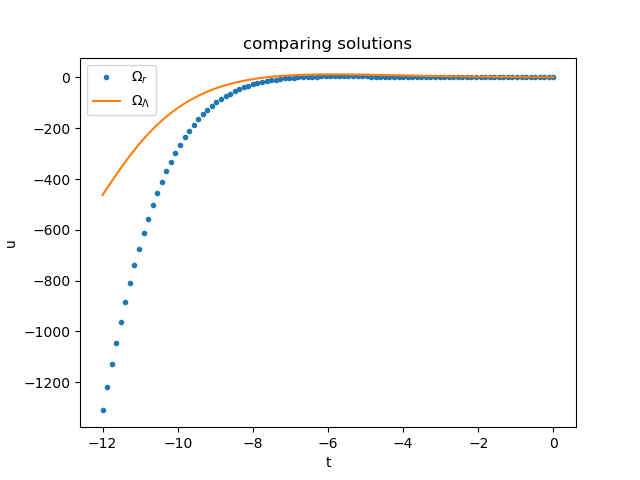

In [29]:
N = np.linspace(Ni, Nf, 100)
Om_net, Or_net, Ol_net = sol_params(N, to_numpy=True)

plt.figure()
#plt.plot(N, Om_net, label='ANN-based solution of $u_1$')
plt.plot(N, Or_net, '.', label='$\Omega_r$')
plt.plot(N, Ol_net, label='$\Omega_\Lambda$')
plt.ylabel('u')
plt.xlabel('t')
plt.title('comparing solutions')
plt.legend()
plt.show()

In [ ]:
#constants
gm = 0
gr= 1.0/3.0
gl= -1

#density parameters measured today
Or0 = 0.0001
Om0 = 0.3
Ol0 = 1-Or0-Om0

#Epochs
epochs = 20000

#Domain
Ni=0
Nf=-12

In [ ]:
#system
continuity = lambda Om,Or,Ol,N:[x*(-3 + pi), y*(-4 + pi), z*pi]
#initial condditions
init_conditions = [IVP(t_0=0.0, u_0=Om0),
                   IVP(t_0=0.0, u_0=Or0),
                   IVP(t_0=0.0, u_0=Ol0)]

<IPython.core.display.Javascript object>


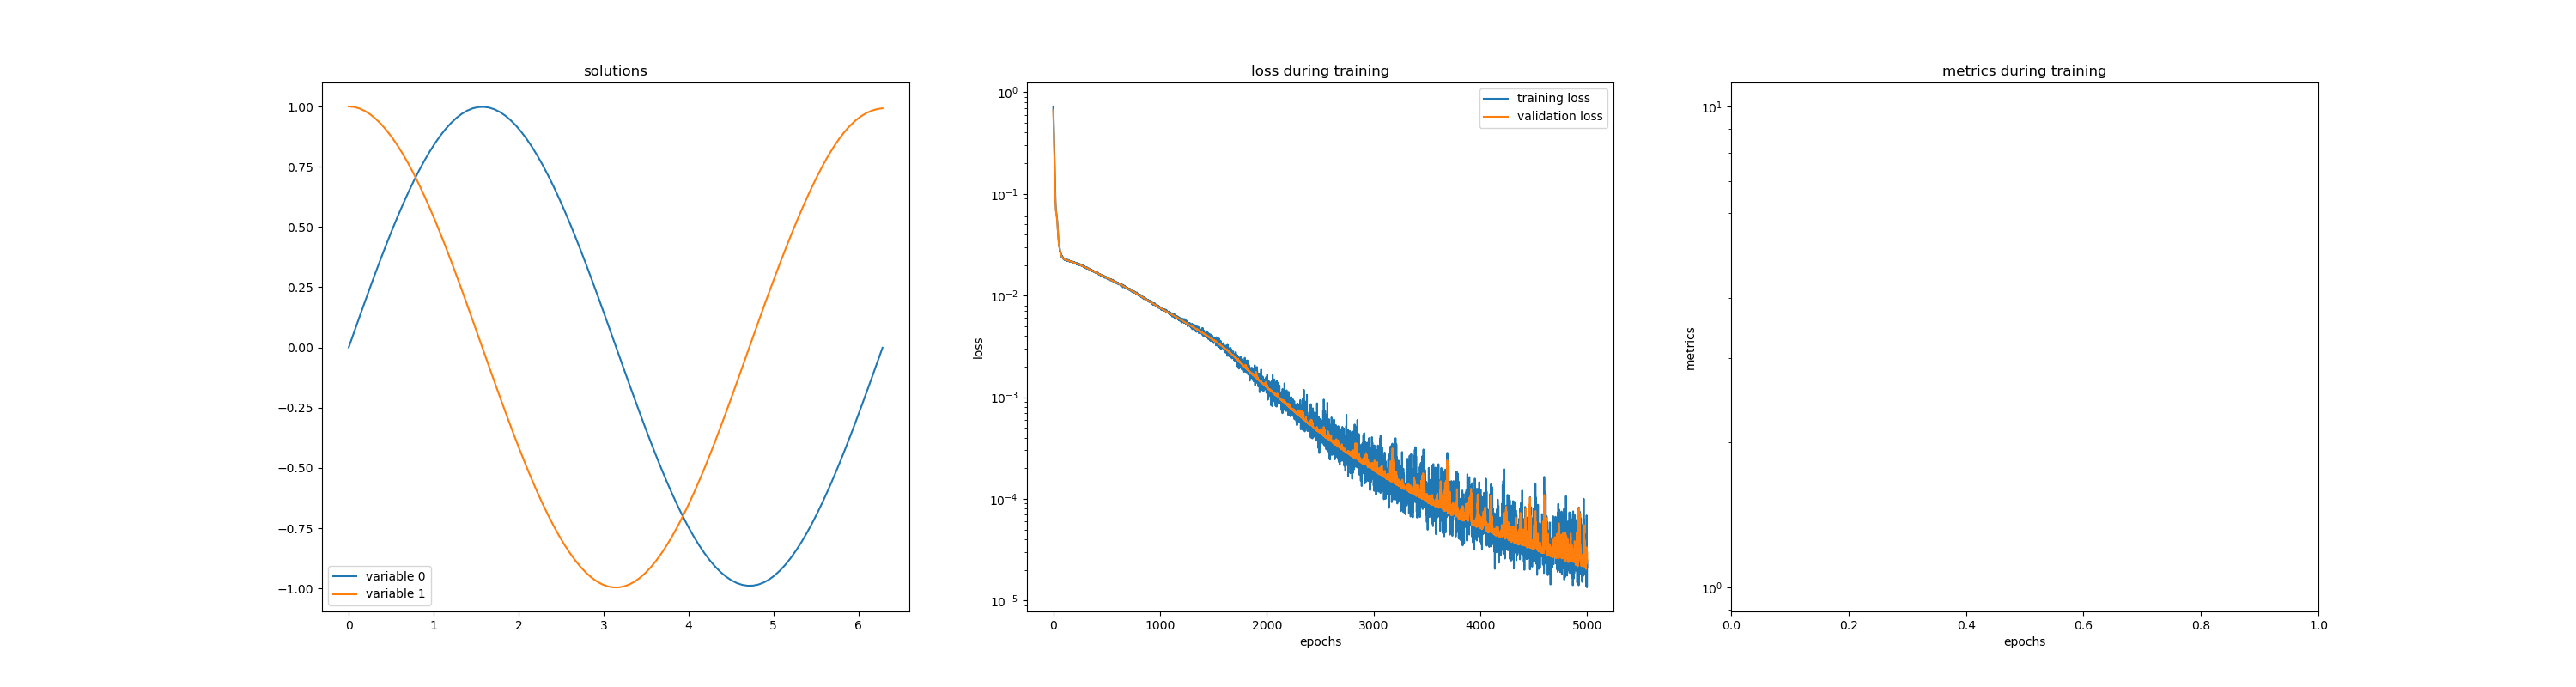

D:\Programas\Anaconda2\lib\site-packages\neurodiffeq\ode.py:260: FutureWarning: The `solve_system` function is deprecated, use a `neurodiffeq.solvers.Solver1D` instance instead
  warnings.warn(
D:\Programas\Anaconda2\lib\site-packages\neurodiffeq\solvers.py:459: UserWarning: Passing `monitor` is deprecated, use a MonitorCallback and pass a list of callbacks instead
  warnings.warn("Passing `monitor` is deprecated, "


Training Progress:   0%|                                                                      | 0/5000 [00:00<…

In [21]:
# specify the ODE system
parametric_circle = lambda u1, u2, t : [diff(u1, t) - u2,
diff(u2, t) + u1]
# specify the initial conditions
init_vals_pc = [
IVP(t_0=0.0, u_0=0.0),IVP(t_0=0.0, u_0=1.0)
]

# solve the ODE system
solution_pc, _ = solve_system(
ode_system=parametric_circle, conditions=init_vals_pc, t_min=0.0, t_max=2*np.pi,
max_epochs=5000,
monitor=Monitor1D(t_min=0.0, t_max=2*np.pi, check_every=100)
)